# Transcodology

Transcoding is the conversion of one digital data format into another digital format. Most of the time, transcoding is an attempt to convert the source material into a smaller material by means of compression. Transcodology is the science that observes and analyses the different actors involved in transcoding. A sub-discipline of transcodology is compressology. Anyway, lets have a look into the world of transcoding.

For our experiment today, we need a high-quality source material. Therefore, we are now looking for a good cat meow in the [freesound](https://freesound.org) library. freesound is a community-run sound library with [more than 500k Creative Commons sounds](https://blog.freesound.org/?p=1340). Because of the licence used in the freesound library, we don't have to worry about copyright infringements in this transcolodgy exercise \*wink smiley\*

Alright, the [cat meowing](https://freesound.org/people/nekoninja/sounds/414042/) uploaded by the user [nekoninja](https://freesound.org/people/nekoninja/) in very good quality (wav-format, samplerate 44100.0 Hz, bitdepth 16 bit, channels stereo) is our selected source material. The user nekoninja mentions in the description that the cats name is sushi. Thank you sushi and nekoninja!


Lets see what info we can get about the file (called "cat-meowing-original.wav" with the following command: 

In [1]:
! ffprobe -hide_banner cat-meowing-original.wav

Input #0, wav, from 'cat-meowing-original.wav':
  Metadata:
    encoder         : Coderium SoundEngine 5.21
  Duration: 00:00:10.18, bitrate: 1411 kb/s
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 2 channels, s16, 1411 kb/s


And we listen to the sound file with the following command:

In [40]:
from IPython.display import Audio 
Audio('cat-meowing-original.wav', autoplay=True)

Now we are going to create a spectogram of the file with the following ffmpeg-command:

In [63]:
! ffmpeg -hide_banner -i cat-meowing-original.wav -lavfi showspectrumpic=s=1000x400:mode=separate  meowing-original-spectrogram.png -y

Guessed Channel Layout for Input Stream #0.0 : stereo
Input #0, wav, from 'cat-meowing-original.wav':
  Metadata:
    encoder         : Coderium SoundEngine 5.21
  Duration: 00:00:10.18, bitrate: 1411 kb/s
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, stereo, s16, 1411 kb/s
Stream mapping:
  Stream #0:0 (pcm_s16le) -> showspectrumpic
  showspectrumpic -> Stream #0:0 (png)
Press [q] to stop, [?] for help
Output #0, image2, to 'meowing-original-spectrogram.png':
  Metadata:
    encoder         : Lavf58.20.100
    Stream #0:0: Video: png, rgb24, 1282x528 [SAR 1:1 DAR 641:264], q=2-31, 200 kb/s, 86.13 fps, 86.13 tbn, 86.13 tbc
    Metadata:
      encoder         : Lavc58.35.100 png
frame=    1 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.01 bitrate=N/A speed=0.0167x    
video:580kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


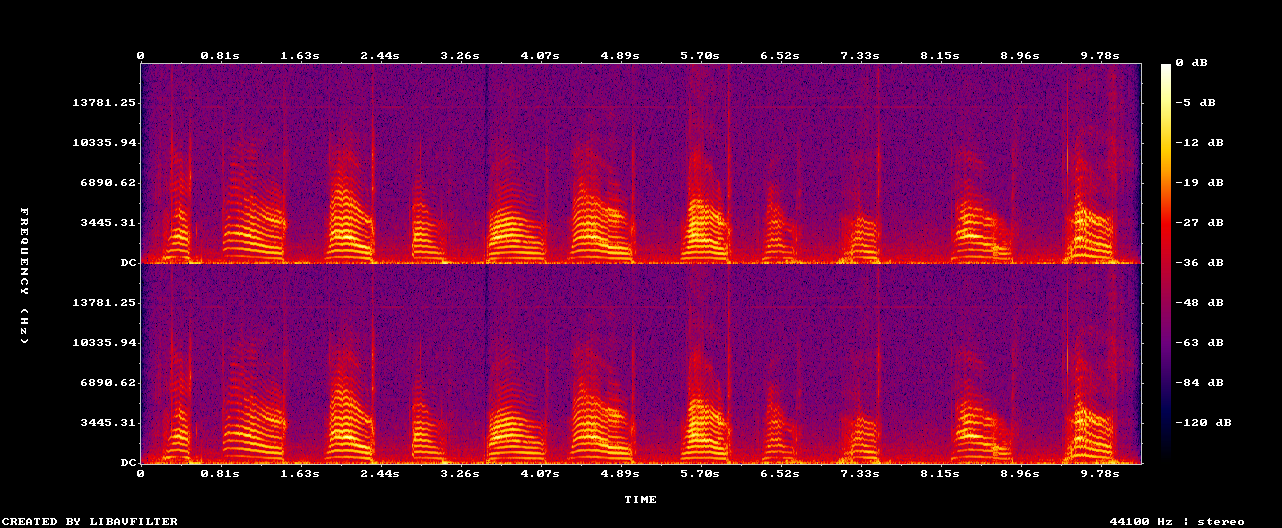

In [64]:
from IPython.display import Image
Image('meowing-original-spectrogram.png') 

In the next to steps we will transcode the original wav-file to a high quality mp3-file and a low quality mp3-file! 

First the compression into a high quality mp3-file with 128kbps:

In [42]:
! ffmpeg -hide_banner -i cat-meowing-original.wav -b:a 128k  cat-meowing-128k.mp3 -y

Guessed Channel Layout for Input Stream #0.0 : stereo
Input #0, wav, from 'cat-meowing-original.wav':
  Metadata:
    encoder         : Coderium SoundEngine 5.21
  Duration: 00:00:10.18, bitrate: 1411 kb/s
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, stereo, s16, 1411 kb/s
Stream mapping:
  Stream #0:0 -> #0:0 (pcm_s16le (native) -> mp3 (libmp3lame))
Press [q] to stop, [?] for help
Output #0, mp3, to 'cat-meowing-128k.mp3':
  Metadata:
    TSSE            : Lavf58.20.100
    Stream #0:0: Audio: mp3 (libmp3lame), 44100 Hz, stereo, s16p, 128 kb/s
    Metadata:
      encoder         : Lavc58.35.100 libmp3lame
size=     160kB time=00:00:10.18 bitrate= 128.7kbits/s speed=19.9x    
video:0kB audio:160kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.282704%


In [6]:
from IPython.display import Audio 
Audio('cat-meowing-128k.mp3', autoplay=True)


And now the spectogram of it:

In [45]:
! ffmpeg -hide_banner -i cat-meowing-128k.mp3 -lavfi showspectrumpic=s=1000x400:mode=separate:legend=disabled  meowing-128k-spectrogram.png -y

Input #0, mp3, from 'cat-meowing-128k.mp3':
  Metadata:
    encoder         : Lavf58.20.100
  Duration: 00:00:10.21, start: 0.025057, bitrate: 128 kb/s
    Stream #0:0: Audio: mp3, 44100 Hz, stereo, fltp, 128 kb/s
    Metadata:
      encoder         : Lavc58.35
Stream mapping:
  Stream #0:0 (mp3float) -> showspectrumpic
  showspectrumpic -> Stream #0:0 (png)
Press [q] to stop, [?] for help
Output #0, image2, to 'meowing-128k-spectrogram.png':
  Metadata:
    encoder         : Lavf58.20.100
    Stream #0:0: Video: png, rgb24, 1000x400 [SAR 1:1 DAR 5:2], q=2-31, 200 kb/s, 86.13 fps, 86.13 tbn, 86.13 tbc
    Metadata:
      encoder         : Lavc58.35.100 png
frame=    1 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.01 bitrate=N/A speed=0.016x    
video:544kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


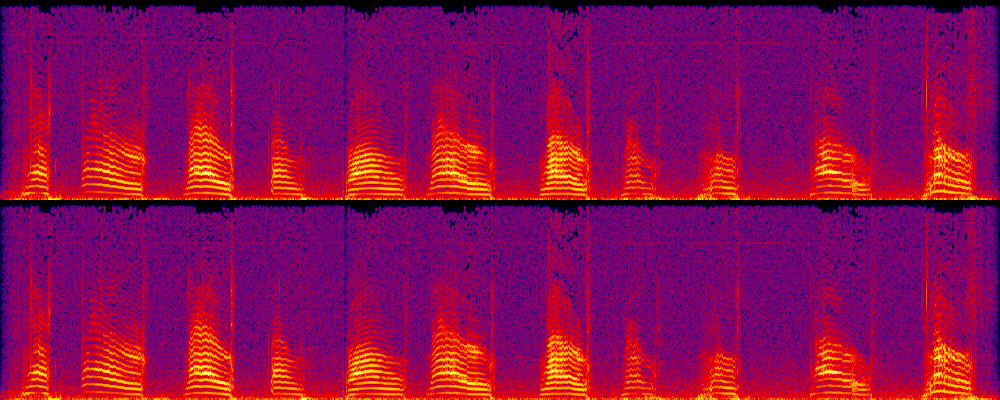

In [46]:
from IPython.display import Image
Image('meowing-128k-spectrogram.png') 

Lets make a really low compression of the original file:

In [47]:
! ffmpeg -hide_banner -i cat-meowing-original.wav -b:a 8k  cat-meowing-8k.mp3 -y

Guessed Channel Layout for Input Stream #0.0 : stereo
Input #0, wav, from 'cat-meowing-original.wav':
  Metadata:
    encoder         : Coderium SoundEngine 5.21
  Duration: 00:00:10.18, bitrate: 1411 kb/s
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, stereo, s16, 1411 kb/s
Stream mapping:
  Stream #0:0 -> #0:0 (pcm_s16le (native) -> mp3 (libmp3lame))
Press [q] to stop, [?] for help
Output #0, mp3, to 'cat-meowing-8k.mp3':
  Metadata:
    TSSE            : Lavf58.20.100
    Stream #0:0: Audio: mp3 (libmp3lame), 44100 Hz, stereo, s16p, 8 kb/s
    Metadata:
      encoder         : Lavc58.35.100 libmp3lame
size=      40kB time=00:00:10.18 bitrate=  32.3kbits/s speed=22.2x    
video:0kB audio:40kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.619248%


In [48]:
! ffmpeg -hide_banner -i cat-meowing-8k.mp3 -lavfi showspectrumpic=s=1000x400:mode=separate:legend=disabled  meowing-8k-spectrogram.png -y

Input #0, mp3, from 'cat-meowing-8k.mp3':
  Metadata:
    encoder         : Lavf58.20.100
  Duration: 00:00:10.21, start: 0.025057, bitrate: 32 kb/s
    Stream #0:0: Audio: mp3, 44100 Hz, stereo, fltp, 32 kb/s
    Metadata:
      encoder         : Lavc58.35
Stream mapping:
  Stream #0:0 (mp3float) -> showspectrumpic
  showspectrumpic -> Stream #0:0 (png)
Press [q] to stop, [?] for help
Output #0, image2, to 'meowing-8k-spectrogram.png':
  Metadata:
    encoder         : Lavf58.20.100
    Stream #0:0: Video: png, rgb24, 1000x400 [SAR 1:1 DAR 5:2], q=2-31, 200 kb/s, 86.13 fps, 86.13 tbn, 86.13 tbc
    Metadata:
      encoder         : Lavc58.35.100 png
frame=    1 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.01 bitrate=N/A speed=0.0313x    
video:113kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


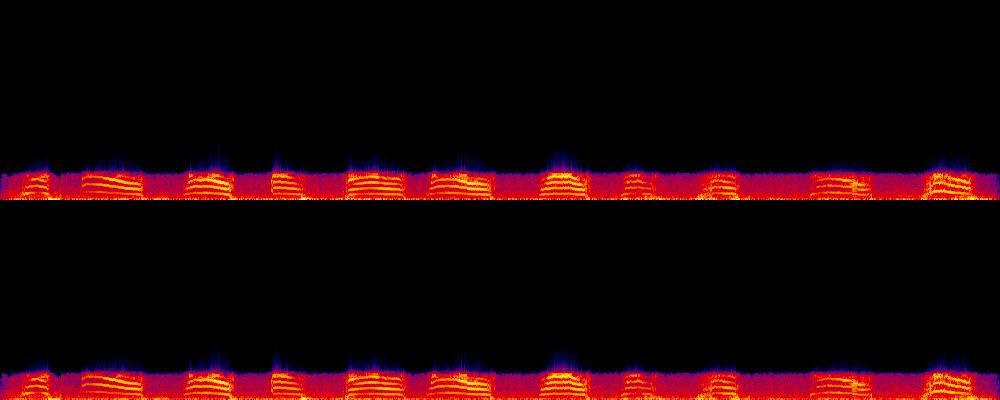

In [49]:
from IPython.display import Image
Image('meowing-8k-spectrogram.png') 

In [50]:
from IPython.display import Audio 
Audio('cat-meowing-8k.mp3', autoplay=True)

What we can see from the image and hear from the audio is that the mp3 compression cuts already a lot of the high frequenies! Lets compare the file sizes of the three different files:

In [32]:
! ls -al  *.wav *.mp3

-rw-rw-r--+ 1 joak joak  163675 Apr 19 07:45 cat-meowing-128k.mp3
-rw-rw-r--+ 1 joak joak   41109 Apr 19 08:06 cat-meowing-8k.mp3
-rw-rw-r--+ 1 joak joak 1796250 Apr 18 23:00 cat-meowing-original.wav


In the next step we will transcode the 'cat-meowing-128k.mp3'-file 100 times and listen what kind of glitches will appear :D


In [53]:
import os

os.system("cp -f cat-meowing-128k.mp3 test/0.mp3") #copy the mp3 to the test folder
for i in range(0,100):
    os.system("ffmpeg -loglevel quiet -hide_banner -i test/"+str(i)+".mp3 test/"+str(i)+".wav -y") #convert from mp3 to wav
    os.system("ffmpeg -loglevel quiet -hide_banner -i test/"+str(i)+".wav -b:a 32k -filter:a 'volume=1.05' test/"+str(i+1)+".mp3 -y") #convert from wav to mp3
    print("Now the script is at step "+str(i)+" of 99")
print("Finished")

Now the script is at step 0 of 99
Now the script is at step 1 of 99
Now the script is at step 2 of 99
Now the script is at step 3 of 99
Now the script is at step 4 of 99
Now the script is at step 5 of 99
Now the script is at step 6 of 99
Now the script is at step 7 of 99
Now the script is at step 8 of 99
Now the script is at step 9 of 99
Now the script is at step 10 of 99
Now the script is at step 11 of 99
Now the script is at step 12 of 99
Now the script is at step 13 of 99
Now the script is at step 14 of 99
Now the script is at step 15 of 99
Now the script is at step 16 of 99
Now the script is at step 17 of 99
Now the script is at step 18 of 99
Now the script is at step 19 of 99
Now the script is at step 20 of 99
Now the script is at step 21 of 99
Now the script is at step 22 of 99
Now the script is at step 23 of 99
Now the script is at step 24 of 99
Now the script is at step 25 of 99
Now the script is at step 26 of 99
Now the script is at step 27 of 99
Now the script is at step 28 o

In [54]:
from IPython.display import Audio 
Audio('test/100.mp3', autoplay=True)

In [56]:
! ffmpeg -hide_banner -i test/100.mp3 -lavfi showspectrumpic=s=1000x400:mode=separate:legend=disabled  test/meowing-100times-spectrogram.png -y

Input #0, mp3, from 'test/100.mp3':
  Metadata:
    encoder         : Lavf58.20.100
  Duration: 00:00:10.21, start: 0.025057, bitrate: 32 kb/s
    Stream #0:0: Audio: mp3, 44100 Hz, stereo, fltp, 32 kb/s
    Metadata:
      encoder         : Lavc58.35
Stream mapping:
  Stream #0:0 (mp3float) -> showspectrumpic
  showspectrumpic -> Stream #0:0 (png)
Press [q] to stop, [?] for help
Output #0, image2, to 'test/meowing-100times-spectrogram.png':
  Metadata:
    encoder         : Lavf58.20.100
    Stream #0:0: Video: png, rgb24, 1000x400 [SAR 1:1 DAR 5:2], q=2-31, 200 kb/s, 86.13 fps, 86.13 tbn, 86.13 tbc
    Metadata:
      encoder         : Lavc58.35.100 png
frame=    1 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.01 bitrate=N/A speed=0.0272x    
video:186kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


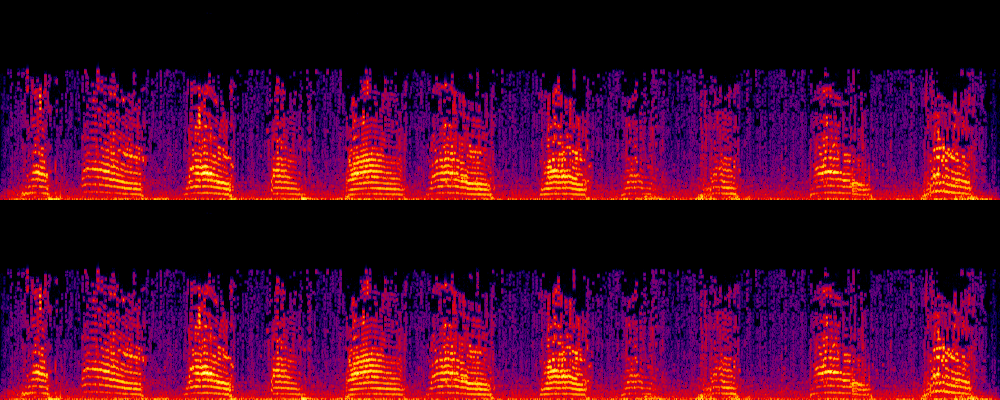

In [31]:
from IPython.display import Image
Image('test/meowing-100times-spectrogram.png') 

Alright that goes into a good direction and even the spectogram looks good. Lets trey it now with 400 times :D

In [57]:
import os

os.system("cp -f cat-meowing-128k.mp3 test/0.mp3") #copy the mp3 to the test folder
for i in range(0,400):
    os.system("ffmpeg -loglevel quiet -hide_banner -i test/"+str(i)+".mp3 test/"+str(i)+".wav -y") #convert from mp3 to wav
    os.system("ffmpeg -loglevel quiet -hide_banner -i test/"+str(i)+".wav -b:a 32k -filter:a 'volume=1.05' test/"+str(i+1)+".mp3 -y") #convert from wav to mp3
    print("Now the script is at step "+str(i)+" of 399")
print("Finished")

Now the script is at step 0 of 399
Now the script is at step 1 of 399
Now the script is at step 2 of 399
Now the script is at step 3 of 399
Now the script is at step 4 of 399
Now the script is at step 5 of 399
Now the script is at step 6 of 399
Now the script is at step 7 of 399
Now the script is at step 8 of 399
Now the script is at step 9 of 399
Now the script is at step 10 of 399
Now the script is at step 11 of 399
Now the script is at step 12 of 399
Now the script is at step 13 of 399
Now the script is at step 14 of 399
Now the script is at step 15 of 399
Now the script is at step 16 of 399
Now the script is at step 17 of 399
Now the script is at step 18 of 399
Now the script is at step 19 of 399
Now the script is at step 20 of 399
Now the script is at step 21 of 399
Now the script is at step 22 of 399
Now the script is at step 23 of 399
Now the script is at step 24 of 399
Now the script is at step 25 of 399
Now the script is at step 26 of 399
Now the script is at step 27 of 399
No

In [61]:
! ffmpeg -hide_banner -i test/400.mp3 -lavfi showspectrumpic=s=1000x400:mode=separate:legend=disabled  test/meowing-400times-spectrogram.png -y

Input #0, mp3, from 'test/400.mp3':
  Metadata:
    encoder         : Lavf58.20.100
  Duration: 00:00:10.21, start: 0.025057, bitrate: 32 kb/s
    Stream #0:0: Audio: mp3, 44100 Hz, stereo, fltp, 32 kb/s
    Metadata:
      encoder         : Lavc58.35
Stream mapping:
  Stream #0:0 (mp3float) -> showspectrumpic
  showspectrumpic -> Stream #0:0 (png)
Press [q] to stop, [?] for help
Output #0, image2, to 'test/meowing-400times-spectrogram.png':
  Metadata:
    encoder         : Lavf58.20.100
    Stream #0:0: Video: png, rgb24, 1282x528 [SAR 1:1 DAR 641:264], q=2-31, 200 kb/s, 86.13 fps, 86.13 tbn, 86.13 tbc
    Metadata:
      encoder         : Lavc58.35.100 png
frame=    1 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.01 bitrate=N/A speed=0.026x    
video:196kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


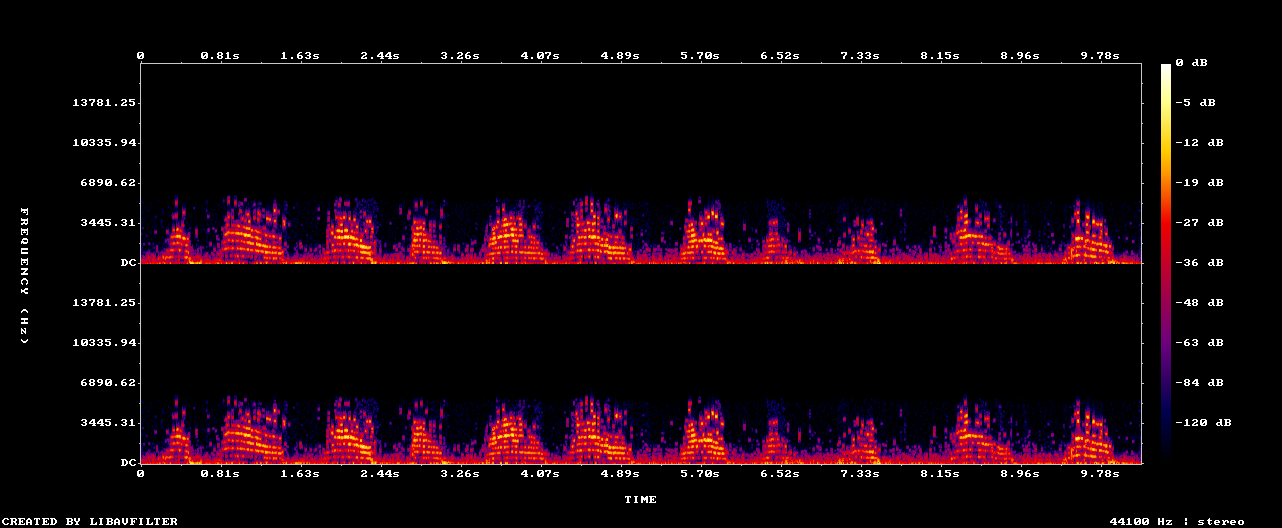

In [62]:
from IPython.display import Image
Image('test/meowing-400times-spectrogram.png') 

In [60]:
from IPython.display import Audio 
Audio('test/400.mp3', autoplay=True)

From nowadays perspective mp3 could be considered as old and outdated. A current state of the art compression is called [opus](https://opus-codec.org/)! 